#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 25 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [5]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

europe_map =plt.imread('map.png')
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}


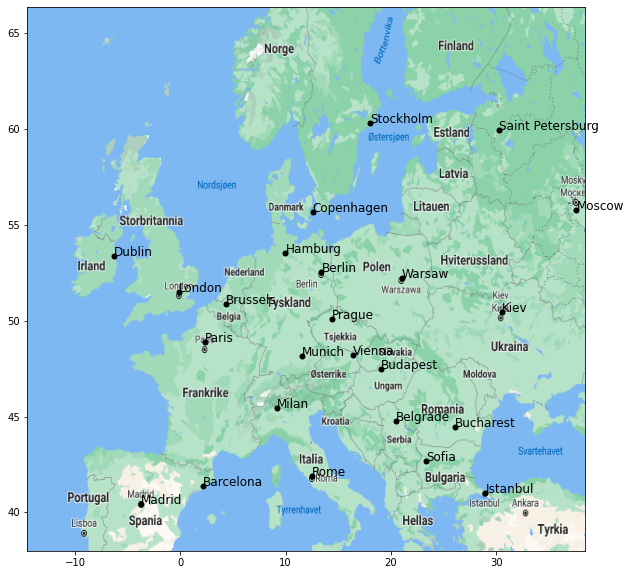

In [6]:
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(europe_map, extent=[-14.56, 38.43,
                              37.697 + 0.3, 64.344 + 2.0], aspect="auto")


# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv

def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43,
                                  37.697 + 0.3, 64.344 + 2.0], aspect="auto")
    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.savefig("")


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


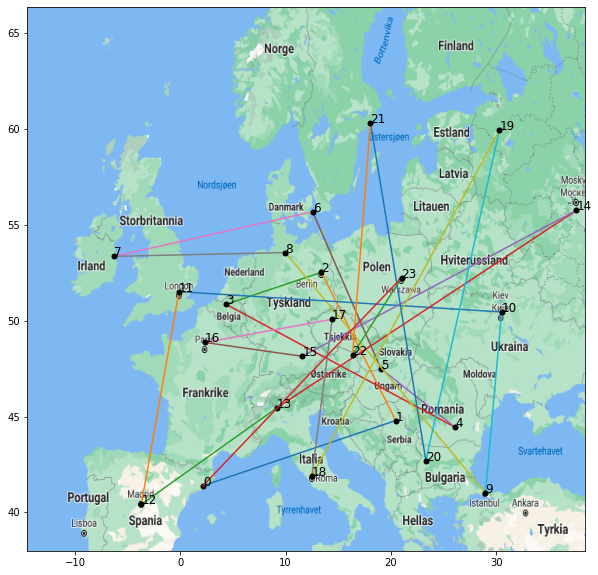

In [7]:
plan = list(city_coords.keys())  # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)


In [261]:
#Blank Cell after using updated version of plot plan

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

With 6 cities the smallest possible distance is: 5018.8099999999995 km 
 
The given city order of these 6 cities is: (1, 0, 3, 2, 5, 4) 

The given time taken to find the right permutation of cities is: 0.002302885055541992 seconds 

['Belgrade', 'Barcelona', 'Brussels', 'Berlin', 'Budapest', 'Bucharest'] 

With 10 cities the smallest possible distance is: 7486.309999999999 km 
 
The given city order of these 10 cities is: (8, 3, 7, 0, 1, 9, 4, 5, 2, 6) 

The given time taken to find the right permutation of cities is: 5.861171007156372 seconds 

['Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen']


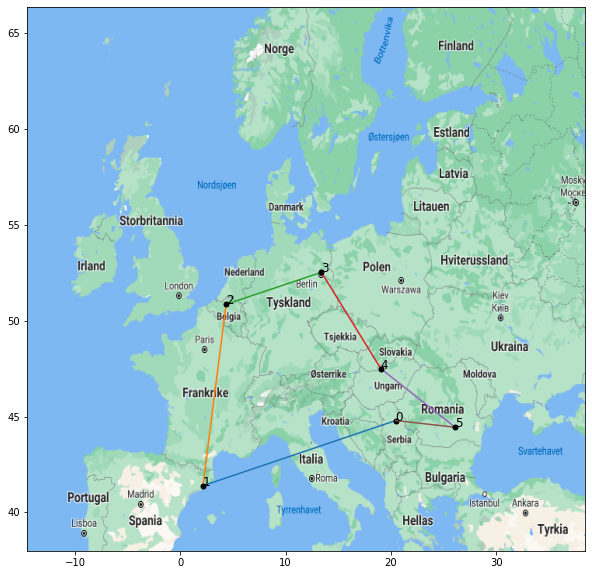

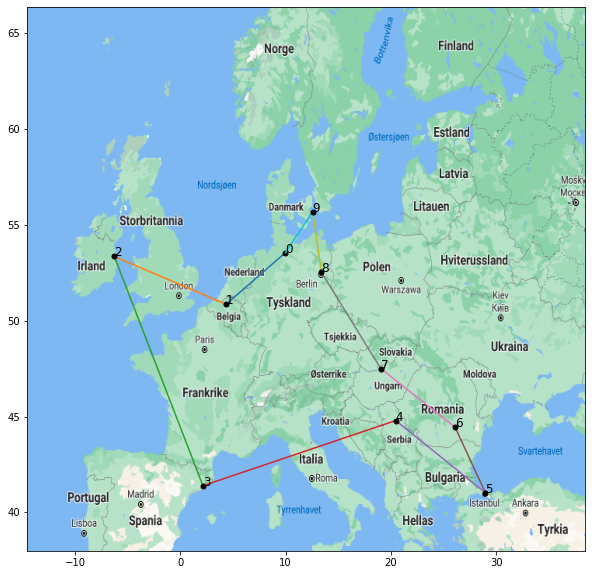

In [18]:
import csv
import numpy as np
import time
from itertools import permutations
cityN = 6

def graph_generate(numC):
    """
    ========================================================================
    Function to create or generate a graph for an arbitrary amount of cities
    ========================================================================

    Arguments:
    ----------
        numC (int): Number of cities 

    Returns:
    --------
        dictionary: A graph in form of a dictionary where each key is the city and the corresponding value is the distance to each city.

    """
    with open("european_cities.csv", "r") as f:
        data = list(csv.reader(f, delimiter=';'))
        cities = data[0]
        city_graph = dict()
        distances = []
        skip = 0
        for distance in data:
            #Meant to skip the first line of data since 
            #it only contains the names of the cities
            if skip >= 1:
                distances.append(tuple(map(float, [distance[i] for i in range(numC)])))
            skip += 1
        for j in range(numC):
            city_graph[cities[j]] = distances[j]
    return city_graph 
    
#Dummy function used for functionality when creating the graph, so just overlook it :)

def total_distance(graph):
    sigma = 0
    for i in graph:
        for j in graph[i]:
            sigma += float(j)
    return sigma
total_distance(graph_generate(6))


def exhaustive_search(graph, cityN):
    """
    ==========================================================
    Function for executing the well-known exhaustive algorithm.
    ==========================================================
    Arguments:
    ----------
        graph (nested list): A nested list where each sublist contains the distance from each city to another (i.e the table in the introduction).
        cityN (int): Number of cities to be computed

    Returns:
    --------
        tuple: Tuple of of two indexes whereas the first corresponds to the best permutation of cities after the solution, 
        and the second contains the distance.
    """
    minPermComb = []
    threshold = 10e9
    gather = list(graph.values())
    for perm in permutations(range(cityN)):
        possibleDistance = 0
        for i in range(cityN):
            possibleDistance += gather[perm[i-1]][perm[i]]

        if possibleDistance < threshold:
            threshold = possibleDistance
            minPermComb = perm
    return minPermComb, threshold

cityN = 6
start = time.time()
cities, pathLen = exhaustive_search(graph_generate(cityN), cityN)
print(f"With 6 cities the smallest possible distance is: {pathLen} km \n ")
print(f"The given city order of these 6 cities is: {cities} \n")
print(f"The given time taken to find the right permutation of cities is: {time.time() - start} seconds \n")

new_plan = []
for i in exhaustive_search(graph_generate(cityN), cityN)[0]:
    new_plan.append(plan[i])
print(f"{new_plan} \n")
plot_plan(new_plan)

# cityN = 7
# start = time.time()
# cities, pathLen = exhaustive_search(graph_generate(cityN), cityN)
# print(f"With 7 cities the smallest possible distance is: {pathLen} \n ")
# print(f"The given city order of these 7 cities is: {cities} \n")
# print(
#     f"The given time taken to find the right permutation of cities is: {time.time() - start} seconds \n")

# cityN = 8
# start = time.time()
# cities, pathLen = exhaustive_search(graph_generate(cityN), cityN)
# print(f"With 8 cities the smallest possible distance is: {pathLen} \n ")
# print(f"The given city order of these 8 cities is: {cities} \n")
# print(
#     f"The given time taken to find the right permutation of cities is: {time.time() - start} seconds \n")

# cityN = 9
# start = time.time()
# cities, pathLen = exhaustive_search(graph_generate(cityN), cityN)
# print(f"With 9 cities the smallest possible distance is: {pathLen} \n ")
# print(f"The given city order of these 9 cities is: {cities} \n")
# print(
#     f"The given time taken to find the right permutation of cities is: {time.time() - start} seconds \n")

cityN = 10
start = time.time()
cities, pathLen = exhaustive_search(graph_generate(cityN), cityN)
print(f"With 10 cities the smallest possible distance is: {pathLen} km \n ")
print(f"The given city order of these 10 cities is: {cities} \n")
print(
    f"The given time taken to find the right permutation of cities is: {time.time() - start} seconds \n")

# cityN = 11
# start = time.time()
# cities, pathLen = exhaustive_search(graph_generate(11), cityN)
# print(f"With 11 cities the smallest possible distance is: {pathLen} \n ")
# print(f"The given city order of these 11 cities is: {cities} \n")
# print(
#     f"The given time taken to find the right permutation of cities is: {time.time() - start} seconds \n")

new_plan = []
for i in exhaustive_search(graph_generate(cityN), cityN)[0]:
    new_plan.append(plan[i])
print(new_plan)
plot_plan(new_plan)


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

# Solution

By the result shown above the best qualified permutation of cities (among the 10 first) are namely (8, 3, 7, 0, 1, 9, 4, 5, 2, 6) which corresponds to 

Hamburg -> Brussel -> Dublin -> Barcelon -> Belgrade -> Istanbul -> Bucharest -> Budapest -> Berlin -> Copenhagen by names. 

The length of the given tour is 7486.309999999999 or approximately 7486.31 km.

The time given for the procedure to terminate at the given permutation and path length took around 5 to 5.2 seconds. Thus to approximate how long it would take to perform an exhaustive search on all 24 cities one could try to express a relation between each time perfomances for some cities < 24. As an observation by the code above it takes around 10 times as long to find the shortest path for an incremented amount of cities. 

This simply means that if we suppose that for 10 cities the total time is $5*10^0$ seconds, it would take approximately $5*10^{14}$ seconds to terminate for all 24 cities. This is no less than $15 844 382.3$ years... 


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

The Minimal Distance found: (7486.3099999999995, [3, 7, 0, 1, 9, 4, 5, 2, 6, 8]) 

The Maximal Distance found: (9172.380000000001, [5, 0, 9, 4, 1, 3, 7, 8, 6, 2])

The Mean Distance found: 8265.588999999998 

Standard Deviation: 428.0764267849842 

Mean time: 0.002716171741485596 

['Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg'] 

The Minimal Distance found: (13631.98, [23, 1, 20, 4, 9, 10, 14, 19, 21, 7, 11, 3, 16, 12, 0, 18, 13, 15, 17, 5, 22, 2, 8, 6]) 

The Maximal Distance found: (19450.829999999994, [22, 9, 4, 10, 23, 8, 3, 7, 11, 15, 20, 1, 18, 16, 0, 12, 13, 17, 19, 14, 5, 2, 6, 21])

The Mean Distance found: 17146.180999999993 

Standard Deviation: 1231.3335599661848 

Mean time: 0.1379391074180603 



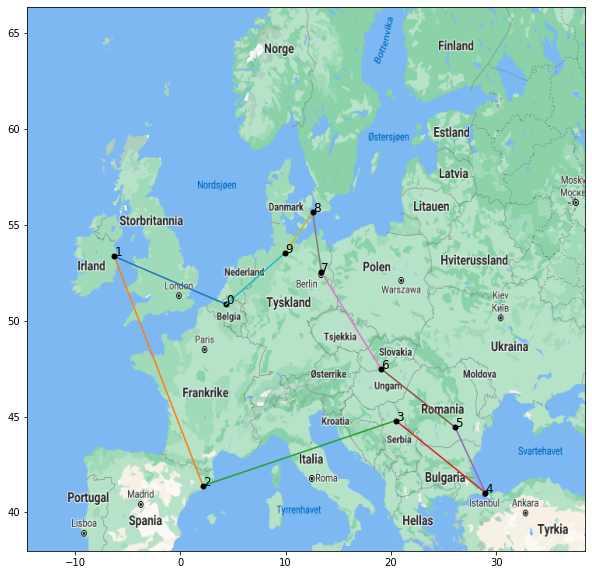

In [19]:
import random
import time
cityN = 10
gather = list(graph_generate(cityN).values())

def random_solution(graph):
    """
    =============================================================
    Function meant to create an inital random solution to the TSP
    =============================================================
    Arguments:
    ----------
        graph (nested list): A nested list where each sublist contains the distance from each city to another 
        (i.e the table in the introduction).

    Returns:
    --------
        list: List that contains the permutation of an inital solution of cities
    """
    cities = [i for i in range(len(graph))]
    initial_solution = []
    for _ in range(len(graph)):
        randCity = random.choice(np.random.permutation(cities))
        initial_solution.append(randCity)
        cities.remove(randCity)
    return initial_solution

def path_length(graph, solution):
    """
    ========================================================================
    Function created to calcute the distance of a general solution of cities
    ========================================================================
    Arguments:
    ----------
        graph (nested list):  A nested list where each sublist contains the distance from each city to another 
        (i.e the table in the introduction).
        solution (list): List contaning an arbitrary permutation of cities

    Returns:
    --------
        float : The distance of the given path between cities
    """
    route = 0
    for i in range(len(solution)):
        route += graph[solution[i-1]][solution[i]]
    return route 
    
def swap(cities, firstSwap, secondSwap):
    """
    =================================================================
    Basic swap function, meant to swap individual elements of a list.
    =================================================================
    Aruments:
    ---------
        cities (list): List with permuation of cities.
        firstSwap (int): First index to be swapped.
        secondSwap (int): Second index to be swapped.

    Returns:
    --------
        list: List with swapped elements.
    """

    cities[firstSwap], cities[secondSwap] = cities[secondSwap], cities[firstSwap]
    return cities

def hill_climbing(graph):
    """
    =======================================================
    The main function to create the Hill Climbing algorithm
    =======================================================
    Arguments:
    ----------
        graph (nested list): A nested list where each sublist contains the distance from each city to another 
        (i.e the table in the introduction).

    Returns:
    --------
        tuple: Tuple containing the best permuation of cities with its respective distance
    """
    current_solution = random_solution(graph)
    current_path = path_length(graph, current_solution)
    finalCityOrder = []

    #The main algorithm, which is adapted from Marsland chapter 9.4.3

    for i in range(len(current_solution)):
        for j in range(i + 1, len(current_solution)):

            possible_solution = current_solution.copy()

            first_city = possible_solution[i]
            second_city = possible_solution[j]

            a = swap(possible_solution, first_city, second_city)
        
            finalCityOrder.append(a)

            for path in finalCityOrder:
                if(path_length(graph, path)) < current_path:
                    current_path = path_length(graph, path)
                    current_solution = path

    return current_path, current_solution


cityN = 10
gather = list(graph_generate(cityN).values())

solutions = []
timeList = []
for _ in range(20):
    start_time = time.time()
    solutions.append(hill_climbing(gather))
    timeList.append((time.time() - start_time))

print(f"The Minimal Distance found: {min(solutions)} \n")
print(f"The Maximal Distance found: {max(solutions)}\n")
print(f"The Mean Distance found: {sum(map(lambda x: x[0], solutions)) / len(solutions)} \n")

sd = []
for sol in solutions:
    sd.append(sol[0])

print(f"Standard Deviation: {stat.pstdev(sd)} \n")
print(f"Mean time: {stat.mean(timeList)} \n")

new_plan2 = []
for i in min(solutions)[1]:
    new_plan2.append(plan[i])
print(f"{new_plan2} \n")
plot_plan(new_plan2)

cityN = 24
gather = list(graph_generate(cityN).values())

solutions = []
timeList = []
for _ in range(20):
    start_time = time.time()
    solutions.append(hill_climbing(gather))
    timeList.append((time.time() - start_time))

print(f"The Minimal Distance found: {min(solutions)} \n")
print(f"The Maximal Distance found: {max(solutions)}\n")
print(
    f"The Mean Distance found: {sum(map(lambda x: x[0], solutions)) / len(solutions)} \n")

sd = []
for sol in solutions:
    sd.append(sol[0])

print(f"Standard Deviation: {stat.pstdev(sd)} \n")
print(f"Mean time: {stat.mean(timeList)} \n")




# Solution:

The Hill Climbing algorithm compared to the Exhaustive search is way quicker. This is mostly due to the fact that it is a local search algorithm trying to optimize the solution by incrementally checking solutions in its searching landscape. In this way it is not neccessary to check all possible solutions to the TSP and thus it drastically reduces the time complexity (meaning it is definitely not $O(N!)$ anymore). Yet it still has some downsides. 

If one ought to have $n$ possible cities to construct a TSP solution from (where $n$ is considered a large number) the probability of finding a local minimum is highly likely. This is due to that there are many local searches to be made and thus incrementally many solutions to compare. With such a high number of comparisons the program might either take to long to converge, or it would find a local minima (which is certainly not a global one) and get stuck. Then the solution is no longer optimal.

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [20]:
# Implement the algorithm here
import random
import csv
from itertools import permutations
import time
import statistics as stat
import math
cityN = 6 
graph = list(graph_generate(cityN).values())

def pmx(first_parent, second_parent, start, end):
    """
    =====================================================================
    Function for the Partial Mapped Crossover, meant to create offspring.
    =====================================================================
    Arguments:
    ----------
        first_parent (list): List with an arbitrary city permuation. 
        second_parent (list): Second list with an arbitrary city permuation.
        start (int): Start index of crossover point.
        end (int): End index of crossover point.

    Returns:
    --------
        list: New list of an arbitrary city permuation made from combining two parents.
    """
    
    child = [None]*len(first_parent)
    child[slice(start, end)] = first_parent[slice(start, end)]

    #Adapted from Eiben and Smith page 70 and 71

    for i, j in enumerate(second_parent[start:end]):
        
        if child.__contains__(j) == False:
            k = second_parent.index(first_parent[i+start])
            while child[k] != None:

                h = first_parent[k]
                k = second_parent.index(h)

            child[k] = j
            
    for i, j in enumerate(child):
        if j == None:
            ind = child.index(j)
            child[ind] = second_parent[i]

    return child 

#Same swap function as above, 
#for some reason I had to implement it locally cause it would not transfer it...

def swap(cities, firstSwap, secondSwap):
    get = cities[firstSwap], cities[secondSwap]
    cities[secondSwap], cities[firstSwap] = get
    return cities

def children1(first_parent, second_parent):
    """
    =======================================================
    Augmented function of PMX meant to create two children,
    as described in Eiben and Smith page 70,71.
    =======================================================
    Arguments:
    ----------
        first_parent (list): List with an arbitrary city permuation. 
        second_parent (list)): Second list with an arbitrary city permuation. 
    Returns:
    --------
        tuple: Tuple of two children
    """
    half_length = len(first_parent) // 2
    start = random.randint(0, half_length)
    end = random.randint(half_length + 1, len(first_parent))

    return pmx(first_parent, second_parent, start, end), pmx(second_parent, first_parent, start, end)


    
def mutation(offPath, cityN, mRate):
    """
    ==============================================================
    Function initiating a Swap Mutation (Eiben and Smith page 69).
    ==============================================================
    Arguments:
    ----------
        offPath (list): Offspring permutation of cities after PMX.
        cityN (int): Number of cities.
        mRate (float): Mutation rate, which is a given probability that some individual mutates.
                       The mutation rate is usually between 0.01 and 0.02.

    Returns:
    --------
        list: Mutated or not mutated offspring permutation.
    """

    for change in range(cityN):
        if(random.random() < mRate):
            substitute = random.randint(0, cityN - 1)

            swap(offPath, change, substitute)
    
    return offPath


def children2(graph, population, size, mRate, cityN):
    """
    ================================================================
    Function for generating children from the given population size.
    ================================================================

    Arguments:
    ----------
        graph (nested list):  A nested list where each sublist contains the distance from each city to another 
        (i.e the table in the introduction).
        population (list): List with permutations of cities.
        size (int): Size of the given population
        mRate (float): Mutation Rate
        cityN (int): Number of cities.

    Returns:
    --------
        tuple: Containing nested lists of the childrens permutation paths
        and their respective distances.
    """
    kids_path = []
    kids_len = []
    half = math.ceil(size // 2)

    for i in range(0, half, 2):
        a = population[i]
        b = population[i+1] 

        child_1, child_2 = children1(a, b)

        mutation(child_1, cityN, mRate)
        mutation(child_2, cityN, mRate)

        kids_path.append(child_1)
        kids_path.append(child_2)
        
        kids_len.append(path_length(graph, child_1))
        kids_len.append(path_length(graph, child_2))

    return kids_path, kids_len 

def generate_population(graph, size):
    """
    ==============================================
    Function meant to generate a given population.
    ==============================================

    Arguments:
    ----------
        graph (nested list):  A nested list where each sublist contains the distance from each city to another 
        (i.e the table in the introduction).
        size (int): Population size.

    Returns:
    --------
        tuple: Containing an arbitrary amount of city permutations with respect
        to the population size and their respective shortest distance after being sorted.
    """
    population = []
    populationL = []

    for _ in range(size):
        initial_path = random_solution(graph)
        length = path_length(graph, initial_path)
        population.append(initial_path)
        populationL.append(length)

    populationL.sort()
    
    return population, populationL[0]

def genetic_algorithm(graph, size, cityN, population, populationLen):
    """
    ==========================================================================
    The main function meant to execute the Genetic Algorithm search heuristic. 
    ==========================================================================

    Arguments:
    ----------
        graph (nested list): A nested list where each sublist contains the distance from each city to another 
        (i.e the table in the introduction).
        size (int): Population size. 
        cityN (int): Number of Cities.
        population (nested list): List containing permutations of cities.
        populationLen (list): List with values of shortest distance after sort.

    Returns:
    --------
        tuple: Containing the shortest distances form populationLen and the population paths.
    """
    path_fitness = []
    for _ in range(0, size):
        population, populationLen = generate_population(graph, size)
        path_fitness.append(populationLen)
        kid_path = children2(graph, population, size, 0.01, cityN)[0]
        population += kid_path
    return path_fitness, population, populationLen


def format_print(list_fitness, time):
    """
    ================================================
    Function meant to print the results more neatly.
    ================================================

    Arguments:
    ----------
        list_fitness (list): List of possible distances within the population.
        time (list): List of time after each execution of the search heuristic.
    """
    min_dist = min(list_fitness)
    max_dist = max(list_fitness)
    sd = stat.stdev(list_fitness)
    mean = stat.mean(list_fitness)
    meanTime = stat.mean(time)

    print(f"The Minimal Distance is: {min_dist}")
    print(f"The Maximal Distance is: {max_dist}")
    print(f"Standard Deviation: {sd}")
    print(f"The Mean Distance is: {mean}")
    print(f"The Mean Time is: {meanTime}")
    print(f"-------------------------------------")

def plot_fit(averageFitness, populationList):
    """
    =====================================================
    Function meant to create plots of the average fitness
    =====================================================

    Arguments:
    ----------
        averageFitness (nested list): With values of the average fitness from each population.
        populationList (list): List with population size values.
    """
    plt.plot(np.linspace(
        0, populationList[-1], populationList[-1]), averageFitness[0], color='red', label=f'Population: {populationList[0]}')
    plt.plot(np.linspace(
        0, populationList[-1], populationList[-1]), averageFitness[1], color='blue', label=f'Population:{populationList[1]}')
    plt.plot(np.linspace(
        0, populationList[-1], populationList[-1]), averageFitness[2], color='green', label=f'Population: {populationList[2]}')
    plt.xlabel('Number of generations')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid()
    plt.show()

def data_process(graph, cityN, populationList):
    """
    ===================================================================================
    Function created to put the GA heuristic under action and analysing its performance
    ===================================================================================

    Arguments:
    ----------
        graph (nested list):  A nested list where each sublist contains the distance from each city to another 
        (i.e the table in the introduction).

        cityN (int): Number of cities.
        populationList (list): List with population sizes.
    """
    fit_plot = []
    for p in populationList:
        print(f"Population Size: {p}")
        fitness_list = []
        time_list = []
        for _ in range(20):
            population, populationLen = generate_population(graph, p)
            start = time.time()
            path_fitness, population, populationLen = genetic_algorithm(graph, p, cityN, population, populationLen)
            fitness_list.append(populationLen)
            time_list.append(time.time() - start)
        format_print(fitness_list, time_list)

    #     average_fitness = []
    #     for i in range(populationList[-1]):
    #         totalFit = 0
    #         for j in range(20):
    #             #print(fitness_list)
    #             totalFit += fitness_list[j]
    #         average_fitness.append(totalFit/20)

    #     fit_plot.append(average_fitness)
    # #plot_fit(fit_plot, [50, 75, 125])

data_process(graph, cityN, [50, 75, 125])



Population Size: 50
The Minimal Distance is: 5018.8099999999995
The Maximal Distance is: 5299.660000000001
Standard Deviation: 106.06235363665746
The Mean Distance is: 5088.138
The Mean Time is: 0.11355388164520264
-------------------------------------
Population Size: 75
The Minimal Distance is: 5018.8099999999995
The Maximal Distance is: 5299.66
Standard Deviation: 76.01431115257182
The Mean Distance is: 5062.085
The Mean Time is: 0.23342593908309936
-------------------------------------
Population Size: 125
The Minimal Distance is: 5018.8099999999995
The Maximal Distance is: 5270.45
Standard Deviation: 67.35392344098997
The Mean Distance is: 5048.9315
The Mean Time is: 0.560881233215332
-------------------------------------


Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

# Solution 

No it sadly did not, but every once in a while it came close (depending on the population size). I had a hard time doing this task sadly because I could not figure out a reasonable way to implement elitism. This might be due to some lack of understanding of a genetic algorithm or pure incompetence in programming (I would really appreciate a rigorous feedback on how to proceed regarding this matter :)) ).

On the brighter side, the running time of the "Algorithm" was not as bad as expected, but of course as for any searching algorithm, the bigger the dataset you have the longer it would take. So for this one example showcased in the PDF the population sizes are a bit small to compensate for a not so tedious and boring grading of the mandatory assingment. Luckily it does not take several million years to terminate for bigger populations.

For every population in my program I decided to construct half as many offsprings. This means that for every population, the intension is to inspect $\frac{\text{population}}{2}$ new tours, thus implying that for the largest population set, the amount of tours inspected would be $125*63 = 7875$.

Just as a little remark:
The reason I chose a mutation rate that was so small is mostly due to the fact that it is not strictly neccessary to mutate a large amount of the population all the time since there might be solutions in the original population that are quite optimal (or have high fitness).

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [1]:
# Implement algorithm here